# Ranking Features of a Smartphone

## Dataset information

- battery_power - Total energy a battery can store in one time measured in mAh
- blue - Has bluetooth (1) or not (0)
- clock_speed - speed at which microprocessor executes instructions
- dual_sim - Has dual sim support (1) or not (0)
- fc - Front Camera mega pixels
- four_g - Has 4G (1) or not (0)
- int_memory - Internal Memory in Gigabytes
- m_dep - Mobile Depth in cm
- mobile_wt - Weight of mobile phone
- n_cores - Number of cores of processor
- pc - Primary Camera mega pixels
- px_height - Pixel Resolution Height
- px_width - Pixel Resolution Width
- ram - Random Access Memory in Mega Bytes
- sc_h - Screen Height of mobile in cm
- sc_w - Screen Width of mobile in cm
- talk_time - longest time that a single battery charge will last
- three_g - Has 3G (1) or not (0)
- touch_screen - Has touch screen (1) or not (0)
- wifi - Has wifi (1) or not (0)
- price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("MobileTrain.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


___
# EDA

In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
data.shape

(2000, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


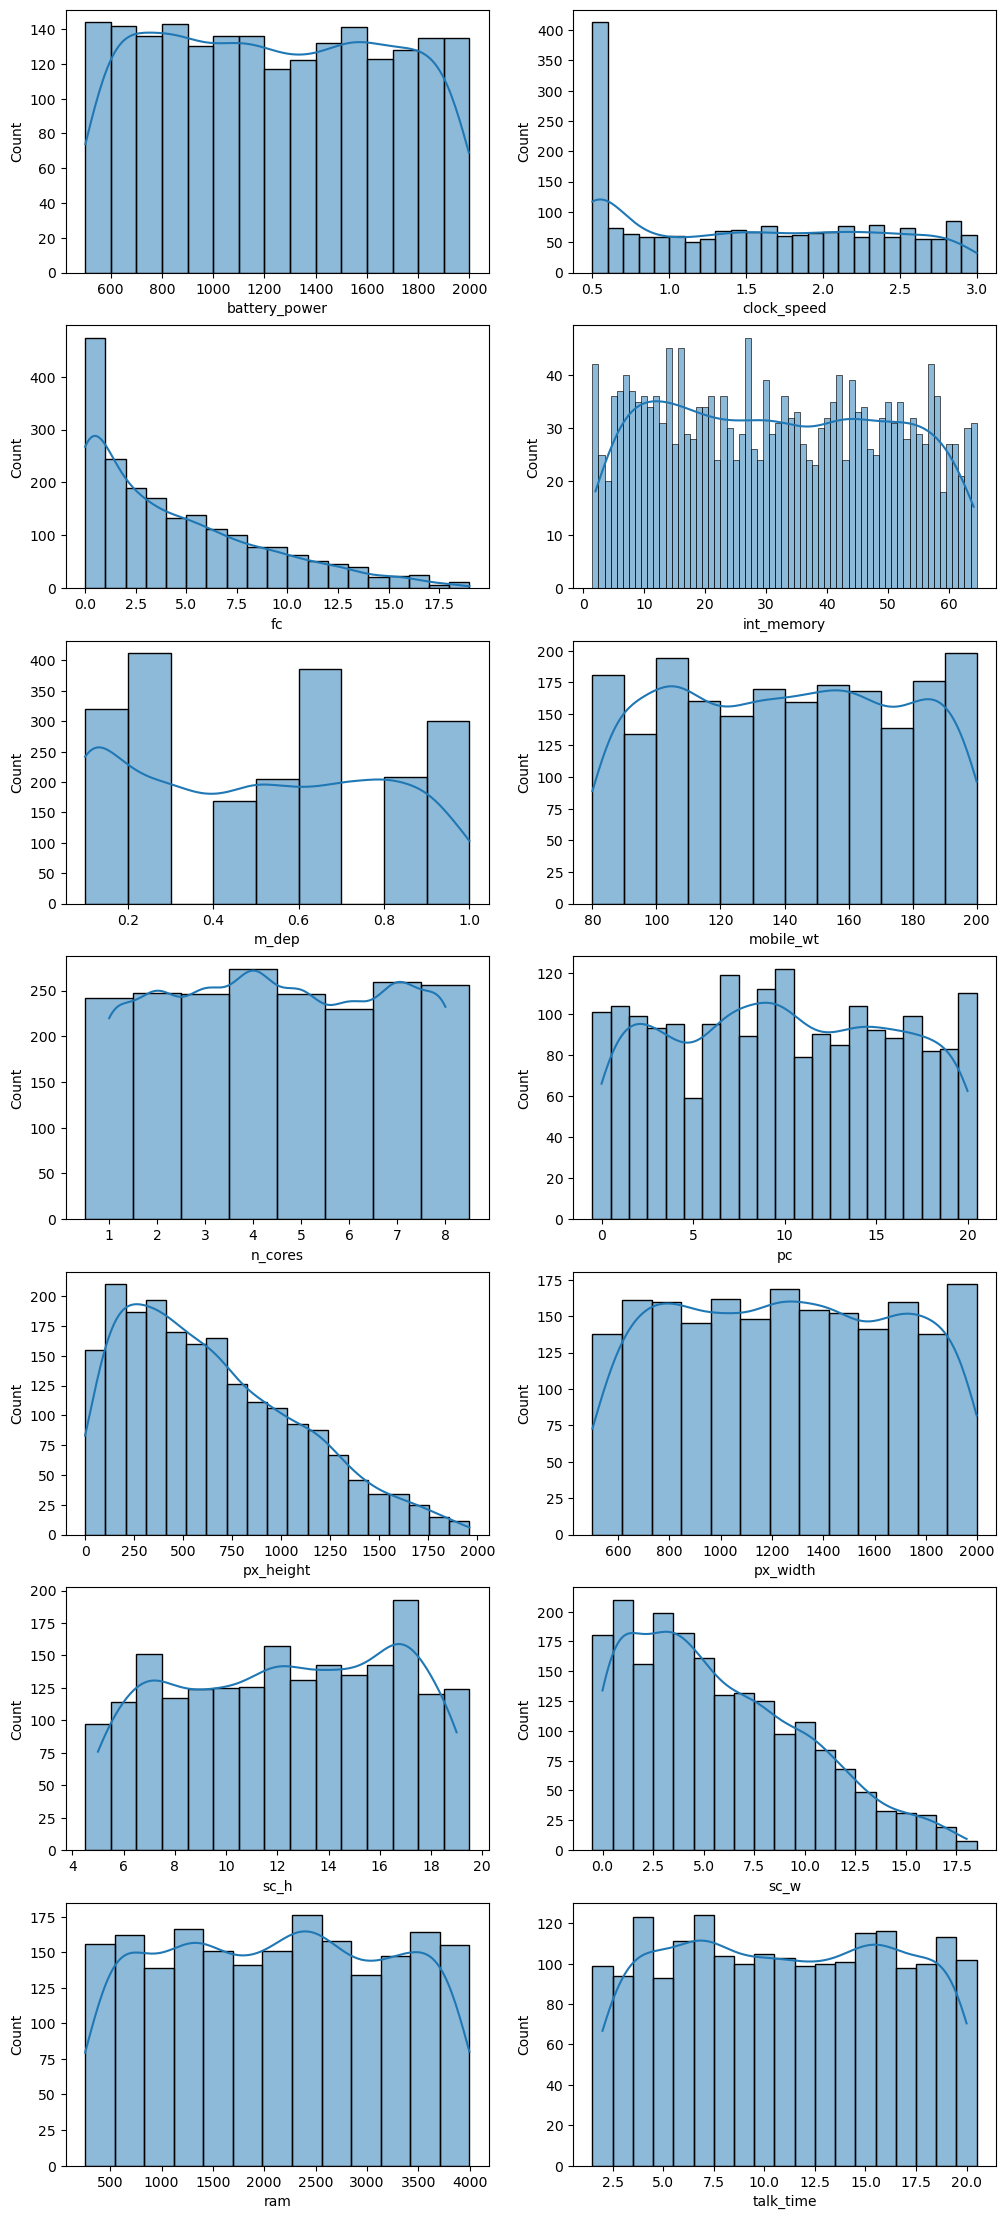

In [51]:
fig, axes = plt.subplots(7, 2, figsize=(12,28))
sns.histplot(data, x = 'battery_power', kde = True, bins = np.arange(500,2100,100), ax = axes[0][0])
sns.histplot(data, x = 'clock_speed', binwidth=0.1, kde = True, ax = axes[0][1])
sns.histplot(data, x = 'fc', kde = True, bins = np.arange(0, 20, 1), ax = axes[1][0])
sns.histplot(data, x = 'int_memory', discrete = True, kde = True, ax = axes[1][1])
sns.histplot(data, x = 'm_dep', binwidth=0.1, kde = True, ax = axes[2][0])
sns.histplot(data, x = 'mobile_wt', binwidth=10, kde = True, ax = axes[2][1])
sns.histplot(data, x = 'n_cores', discrete = True, kde = True, ax = axes[3][0])
sns.histplot(data, x = 'pc', discrete = True, kde = True, ax = axes[3][1])
sns.histplot(data, x = 'px_height', kde = True, ax = axes[4][0])
sns.histplot(data, x = 'px_width', kde = True, ax = axes[4][1])
sns.histplot(data, x = 'sc_h', discrete = True, kde = True, ax = axes[5][0])
sns.histplot(data, x = 'sc_w', discrete = True, kde = True, ax = axes[5][1])
sns.histplot(data, x = 'ram', kde = True, ax = axes[6][0])
sns.histplot(data, x = 'talk_time', discrete = True, kde = True, ax = axes[6][1])
plt.show()

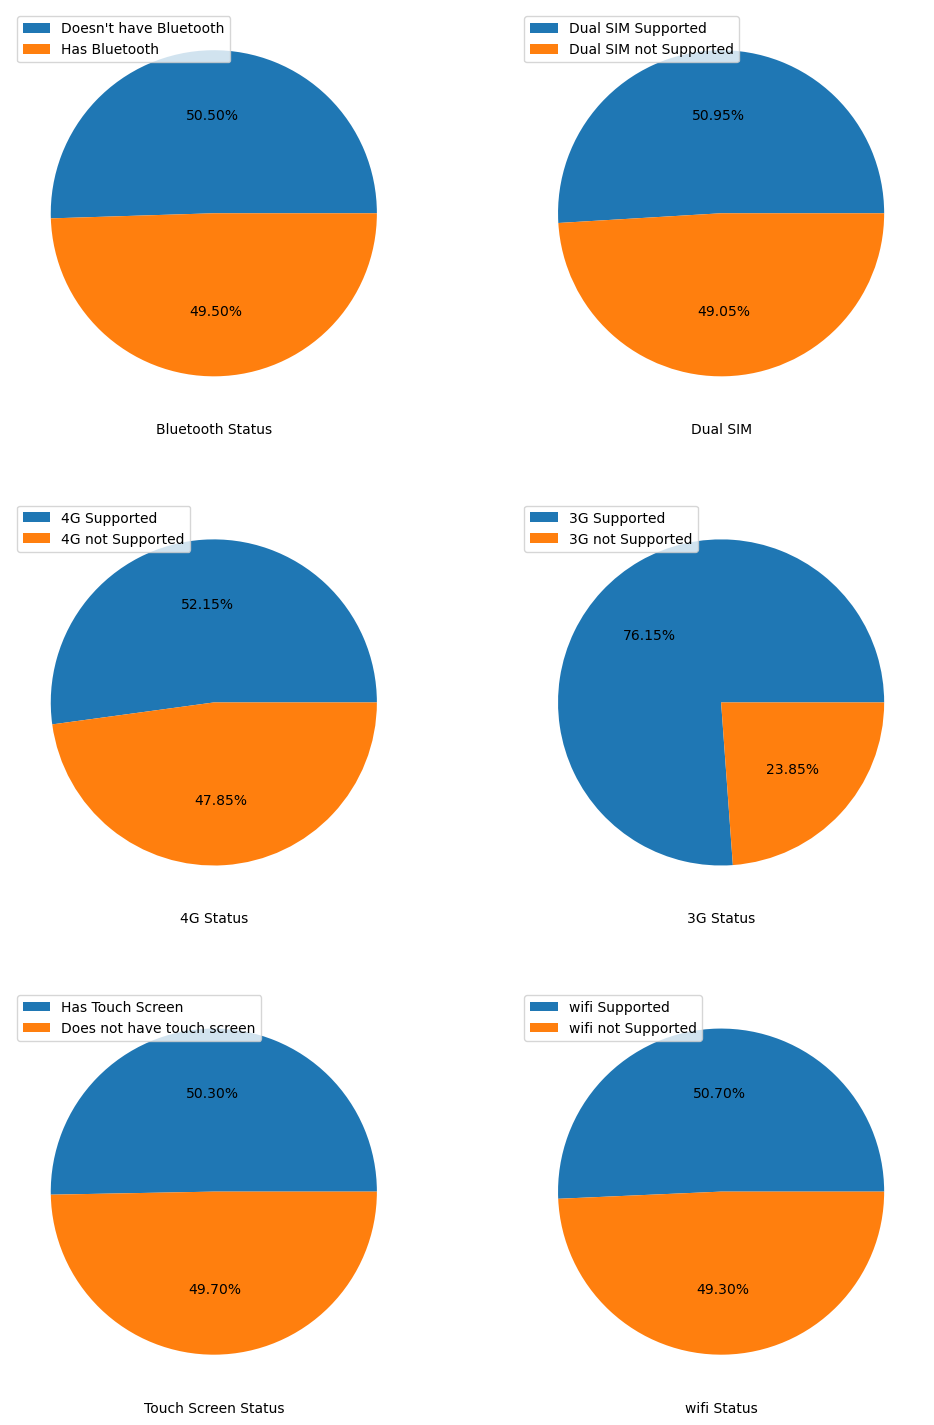

In [76]:
fig, axes = plt.subplots(3,2,figsize = (12,18))

data['blue'].value_counts().plot.pie(autopct = '%.2f%%', labeldistance=None, ax = axes[0][0])
axes[0][0].legend(["Doesn't have Bluetooth", 'Has Bluetooth'], loc = 'upper left')
axes[0][0].set_ylabel("")
axes[0][0].set_xlabel("Bluetooth Status")

data['dual_sim'].value_counts().plot.pie(autopct = '%.2f%%', labeldistance=None, ax = axes[0][1])
axes[0][1].legend(["Dual SIM Supported", 'Dual SIM not Supported'], loc = 'upper left')
axes[0][1].set_ylabel("")
axes[0][1].set_xlabel("Dual SIM")

data['four_g'].value_counts().plot.pie(autopct = '%.2f%%', labeldistance=None, ax = axes[1][0])
axes[1][0].legend(["4G Supported", '4G not Supported'], loc = 'upper left')
axes[1][0].set_ylabel("")S
axes[1][0].set_xlabel("4G Status")

data['three_g'].value_counts().plot.pie(autopct = '%.2f%%', labeldistance=None, ax = axes[1][1])
axes[1][1].legend(["3G Supported", '3G not Supported'], loc = 'upper left')
axes[1][1].set_ylabel("")
axes[1][1].set_xlabel("3G Status")

data['touch_screen'].value_counts().plot.pie(autopct = '%.2f%%', labeldistance=None, ax = axes[2][0])
axes[2][0].legend(["Has Touch Screen", 'Does not have touch screen'], loc = 'upper left')
axes[2][0].set_ylabel("")
axes[2][0].set_xlabel("Touch Screen Status")

data['wifi'].value_counts().plot.pie(autopct = '%.2f%%', labeldistance=None, ax = axes[2][1])
axes[2][1].legend(["wifi Supported", 'wifi not Supported'], loc = 'upper left')
axes[2][1].set_ylabel("")
axes[2][1].set_xlabel("wifi Status")

plt.show()

- Most phones have cameras with low megapixel counts
- Most phones have low screen width
- Many phones have a very low clock speed and the number of phones remains almost uniform for higher clock speeds
- Most phones have at least 3G
- The features are almost uniformly distributed for all other columns

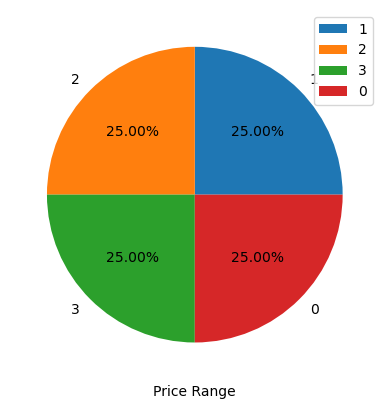

In [79]:
data['price_range'].value_counts().plot.pie(autopct = '%.2f%%')
plt.legend()
plt.ylabel("")
plt.xlabel("Price Range")
plt.show()

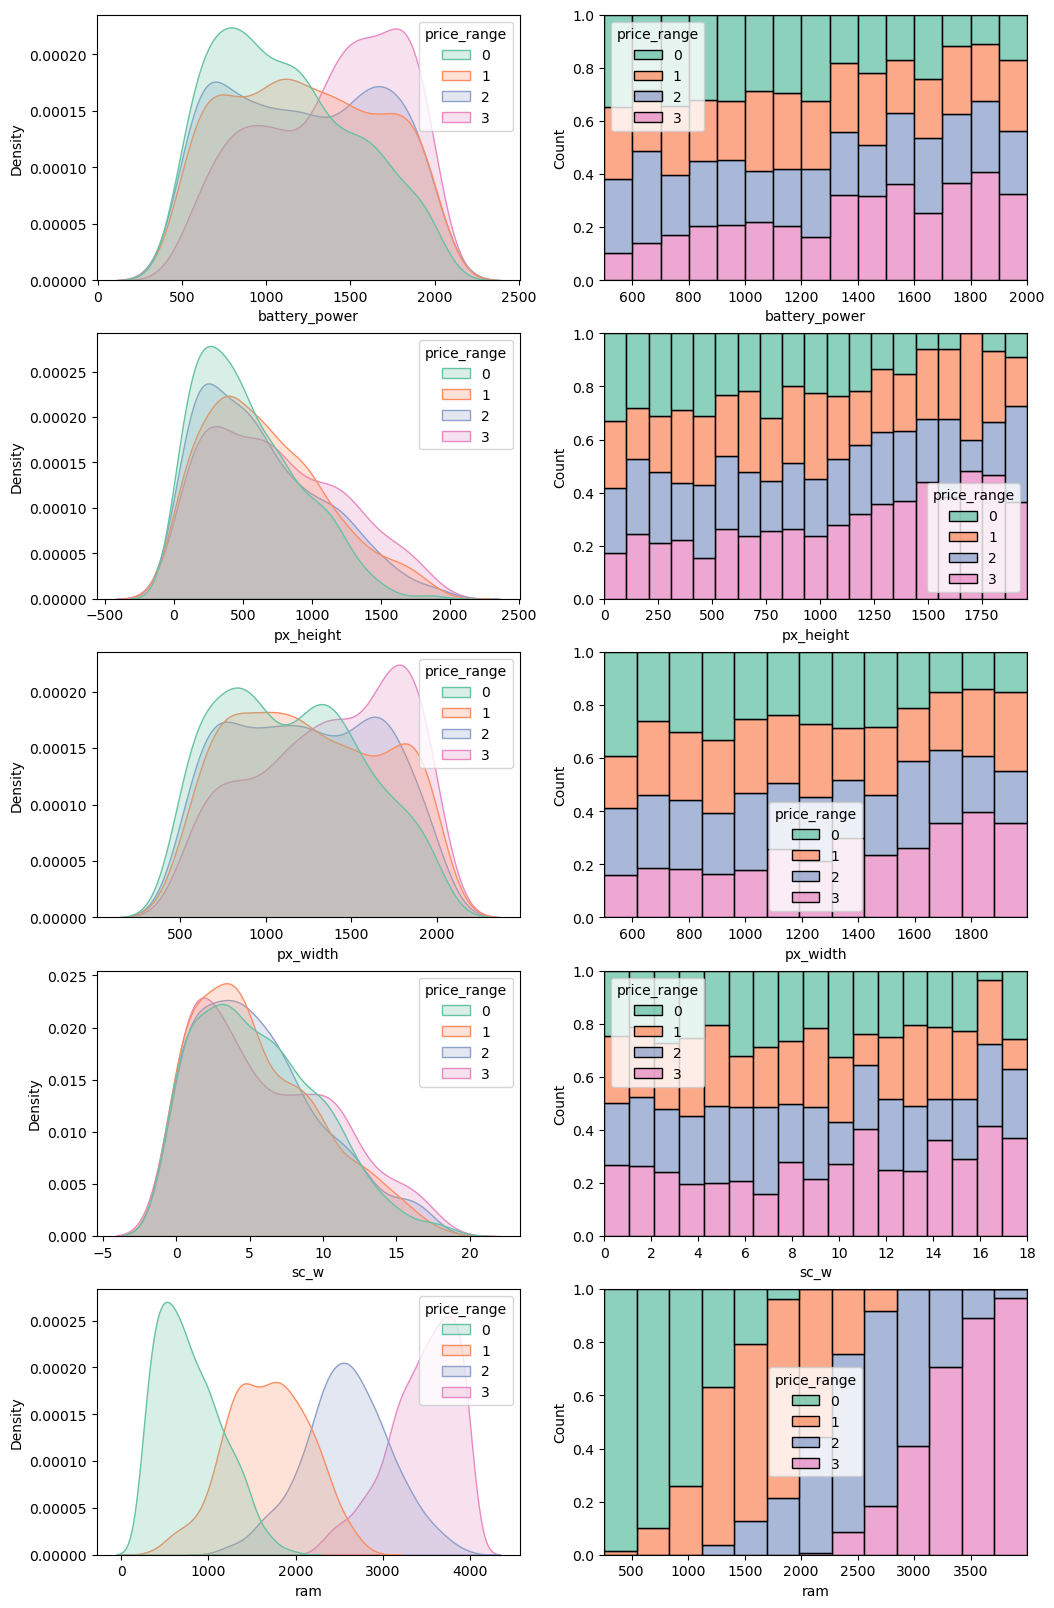

In [59]:
fig, axes = plt.subplots(5, 2, figsize=(12,20))
sns.kdeplot(data, x = 'battery_power', hue='price_range', palette='Set2', fill=True, ax = axes[0][0])
sns.histplot(data, x = 'battery_power',  hue='price_range', bins = np.arange(500,2100,100), multiple='fill', palette = 'Set2', ax = axes[0][1])
sns.kdeplot(data, x = 'px_height',  hue='price_range', fill=True, palette = 'Set2', ax = axes[1][0])
sns.histplot(data, x = 'px_height',  hue='price_range', multiple='fill', palette = 'Set2', ax = axes[1][1])
sns.kdeplot(data, x = 'px_width',  hue='price_range', fill=True, palette = 'Set2', ax = axes[2][0])
sns.histplot(data, x = 'px_width',  hue='price_range', multiple='fill', palette = 'Set2', ax = axes[2][1])
sns.kdeplot(data, x = 'sc_w',  hue='price_range', fill=True, palette = 'Set2', ax = axes[3][0])
sns.histplot(data, x = 'sc_w',  hue='price_range', multiple='fill', palette = 'Set2', ax = axes[3][1])
sns.kdeplot(data, x = 'ram',  hue='price_range', fill=True, palette = 'Set2', ax = axes[4][0])
sns.histplot(data, x = 'ram',  hue='price_range', multiple='fill', palette = 'Set2', ax = axes[4][1])
plt.show()

- ram shows a high positive correlation with price range
- battery power, px_height and px_width show low positive correlations with price range

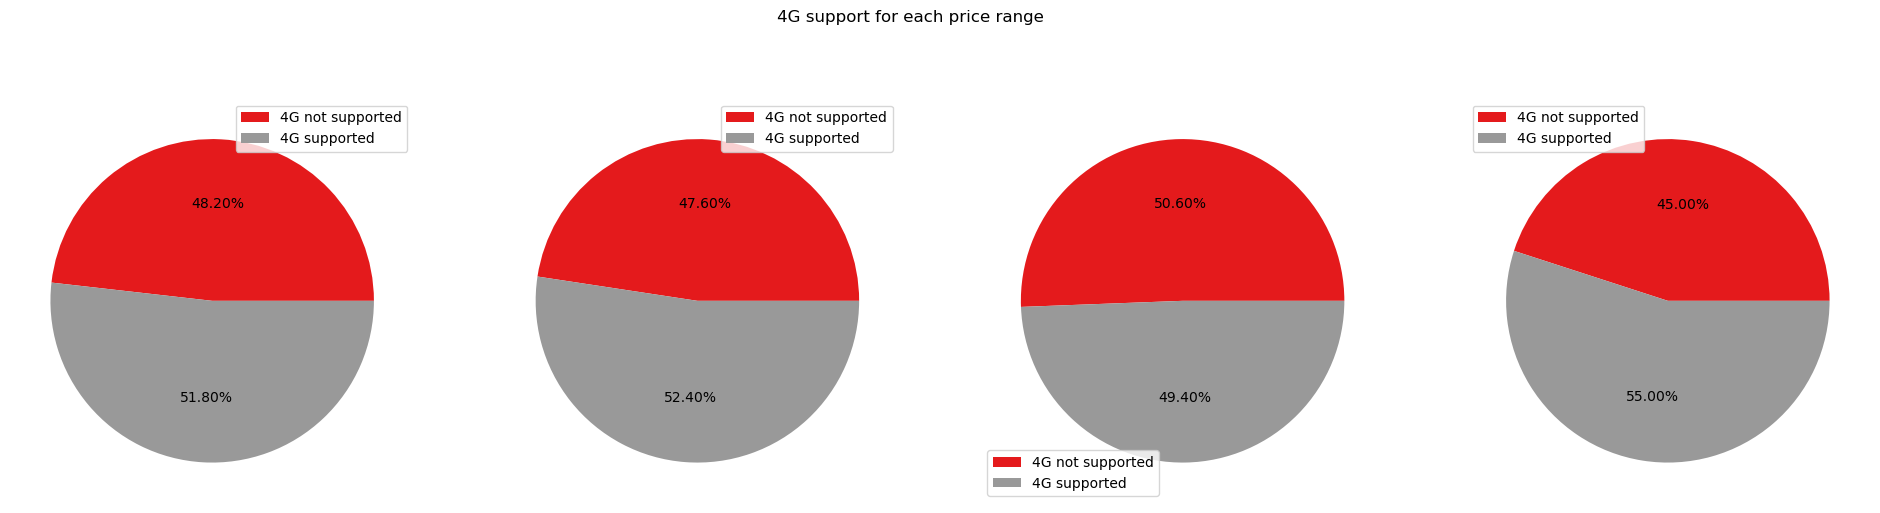

In [10]:
axes = data.groupby(by = 'price_range')['four_g'].value_counts().unstack('price_range').plot.pie(subplots=True, autopct = '%.2f%%', figsize = (24,6), colormap = 'Set1', labeldistance=None)
for ax in axes:
    ax.legend(['4G not supported', '4G supported'])
    ax.set_ylabel('')
plt.suptitle('4G support for each price range')
plt.show()

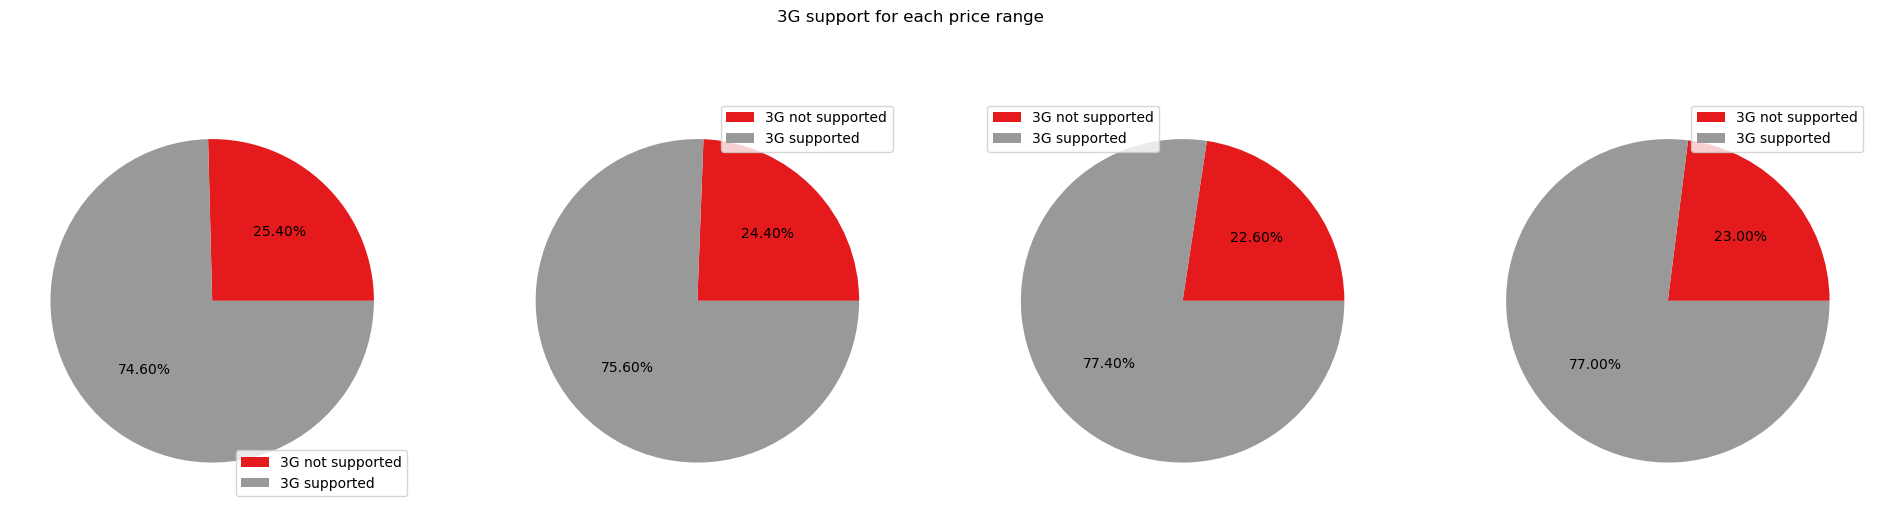

In [12]:
axes = data.groupby(by = 'price_range')['three_g'].value_counts().unstack('price_range').plot.pie(subplots=True, autopct = '%.2f%%', figsize = (24,6), colormap = 'Set1', labeldistance=None)
for ax in axes:
    ax.legend(['3G not supported', '3G supported'])
    ax.set_ylabel('')
plt.suptitle('3G support for each price range')
plt.show()

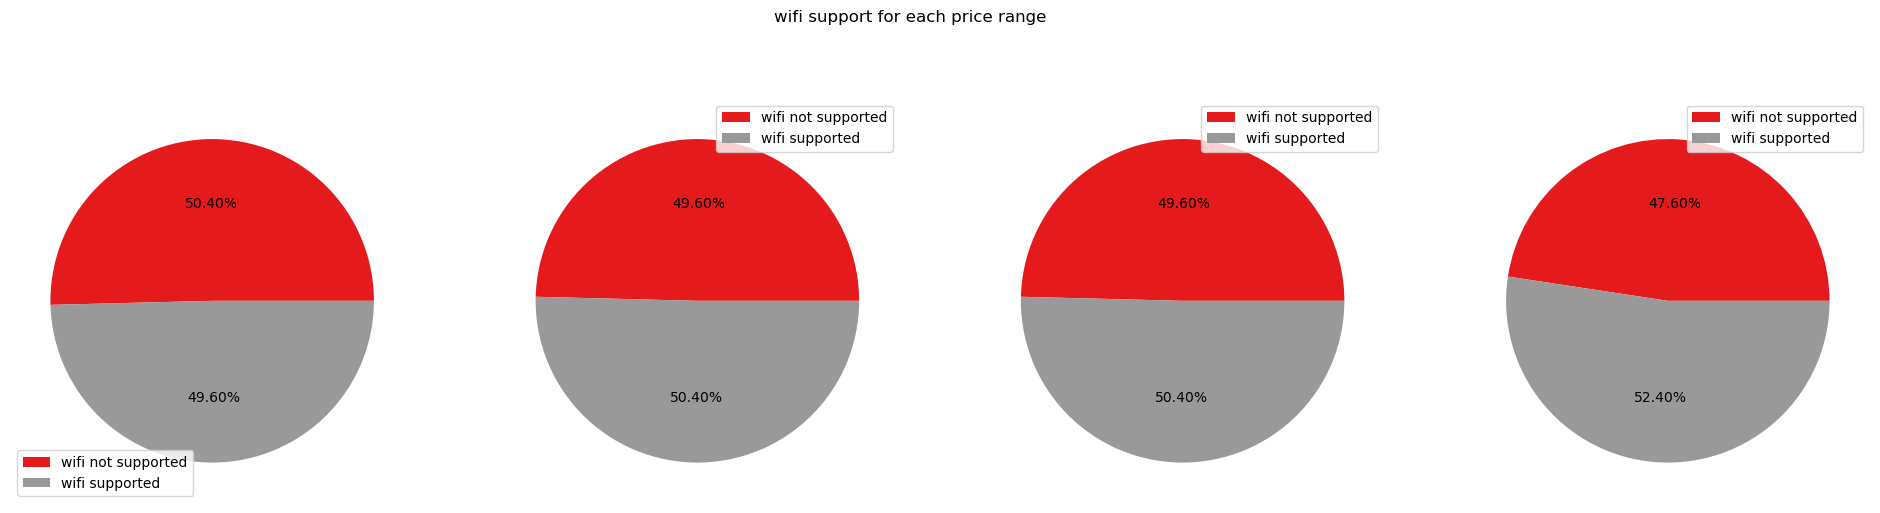

In [15]:
axes = data.groupby(by = 'price_range')['wifi'].value_counts().unstack('price_range').plot.pie(subplots=True, autopct = '%.2f%%', figsize = (24,6), colormap = 'Set1', labeldistance=None)
for ax in axes:
    ax.legend(['wifi not supported', 'wifi supported'])
    ax.set_ylabel('')
plt.suptitle('wifi support for each price range')
plt.show()

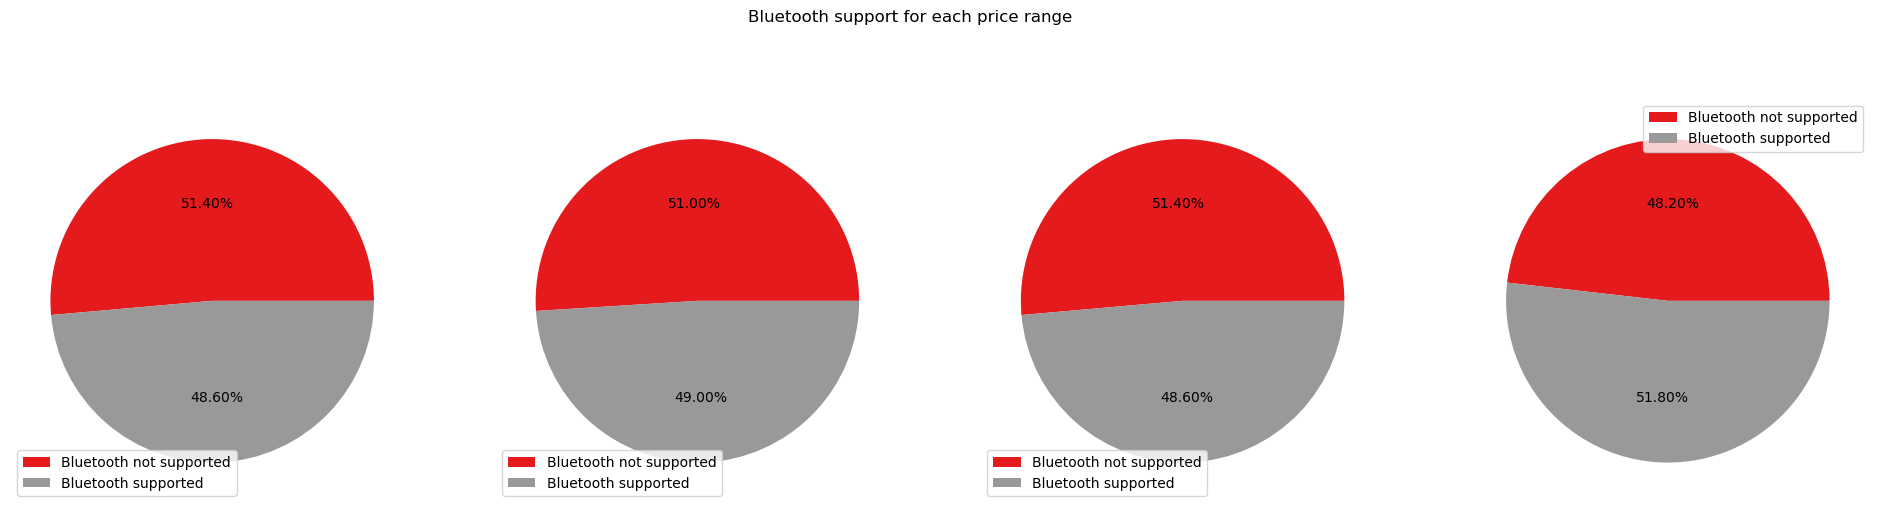

In [17]:
axes = data.groupby(by = 'price_range')['blue'].value_counts().unstack('price_range').plot.pie(subplots=True, autopct = '%.2f%%', figsize = (24,6), colormap = 'Set1', labeldistance=None)
for ax in axes:
    ax.legend(['Bluetooth not supported', 'Bluetooth supported'])
    ax.set_ylabel('')
plt.suptitle('Bluetooth support for each price range')
plt.show()

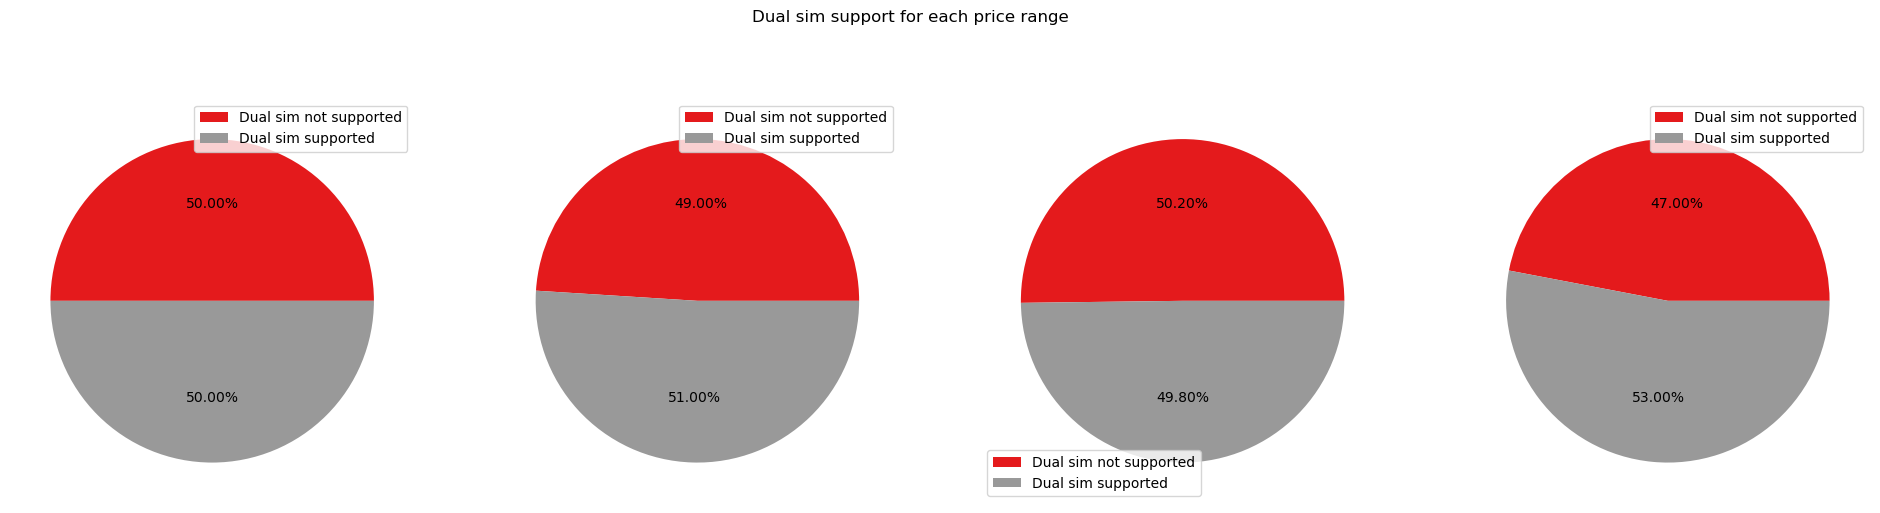

In [19]:
axes = data.groupby(by = 'price_range')['dual_sim'].value_counts().unstack('price_range').plot.pie(subplots=True, autopct = '%.2f%%', figsize = (24,6), colormap = 'Set1', labeldistance=None)
for ax in axes:
    ax.legend(['Dual sim not supported', 'Dual sim supported'])
    ax.set_ylabel('')
plt.suptitle('Dual sim support for each price range')
plt.show()

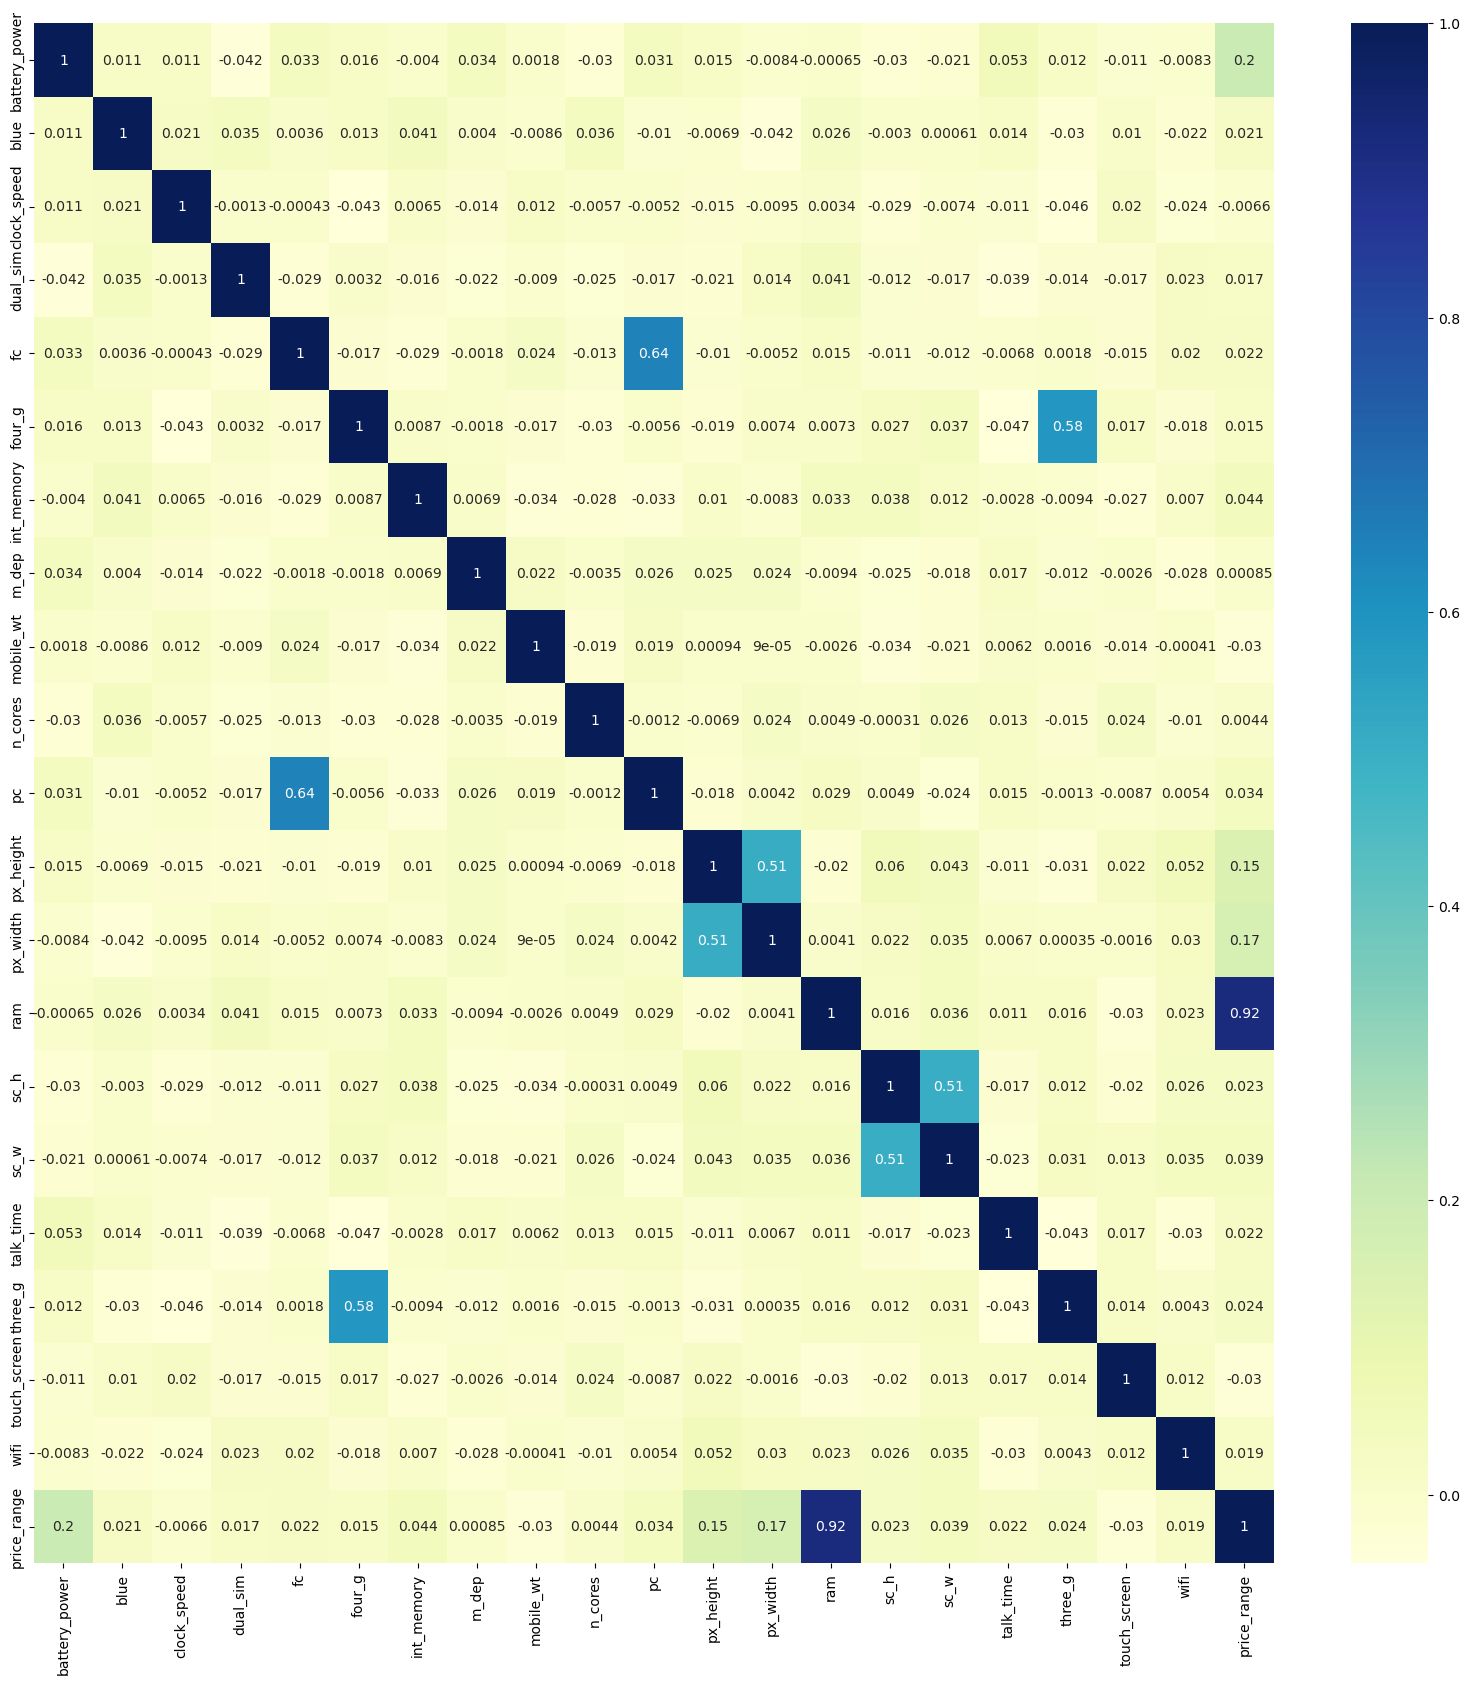

In [29]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

Features that are highly correlated with each other
- pc and fc
- four_g and three_g
- px_height and px_width
- sc_h and sc_w
- ram and price_range

___
# Preprocessing

## Outliers

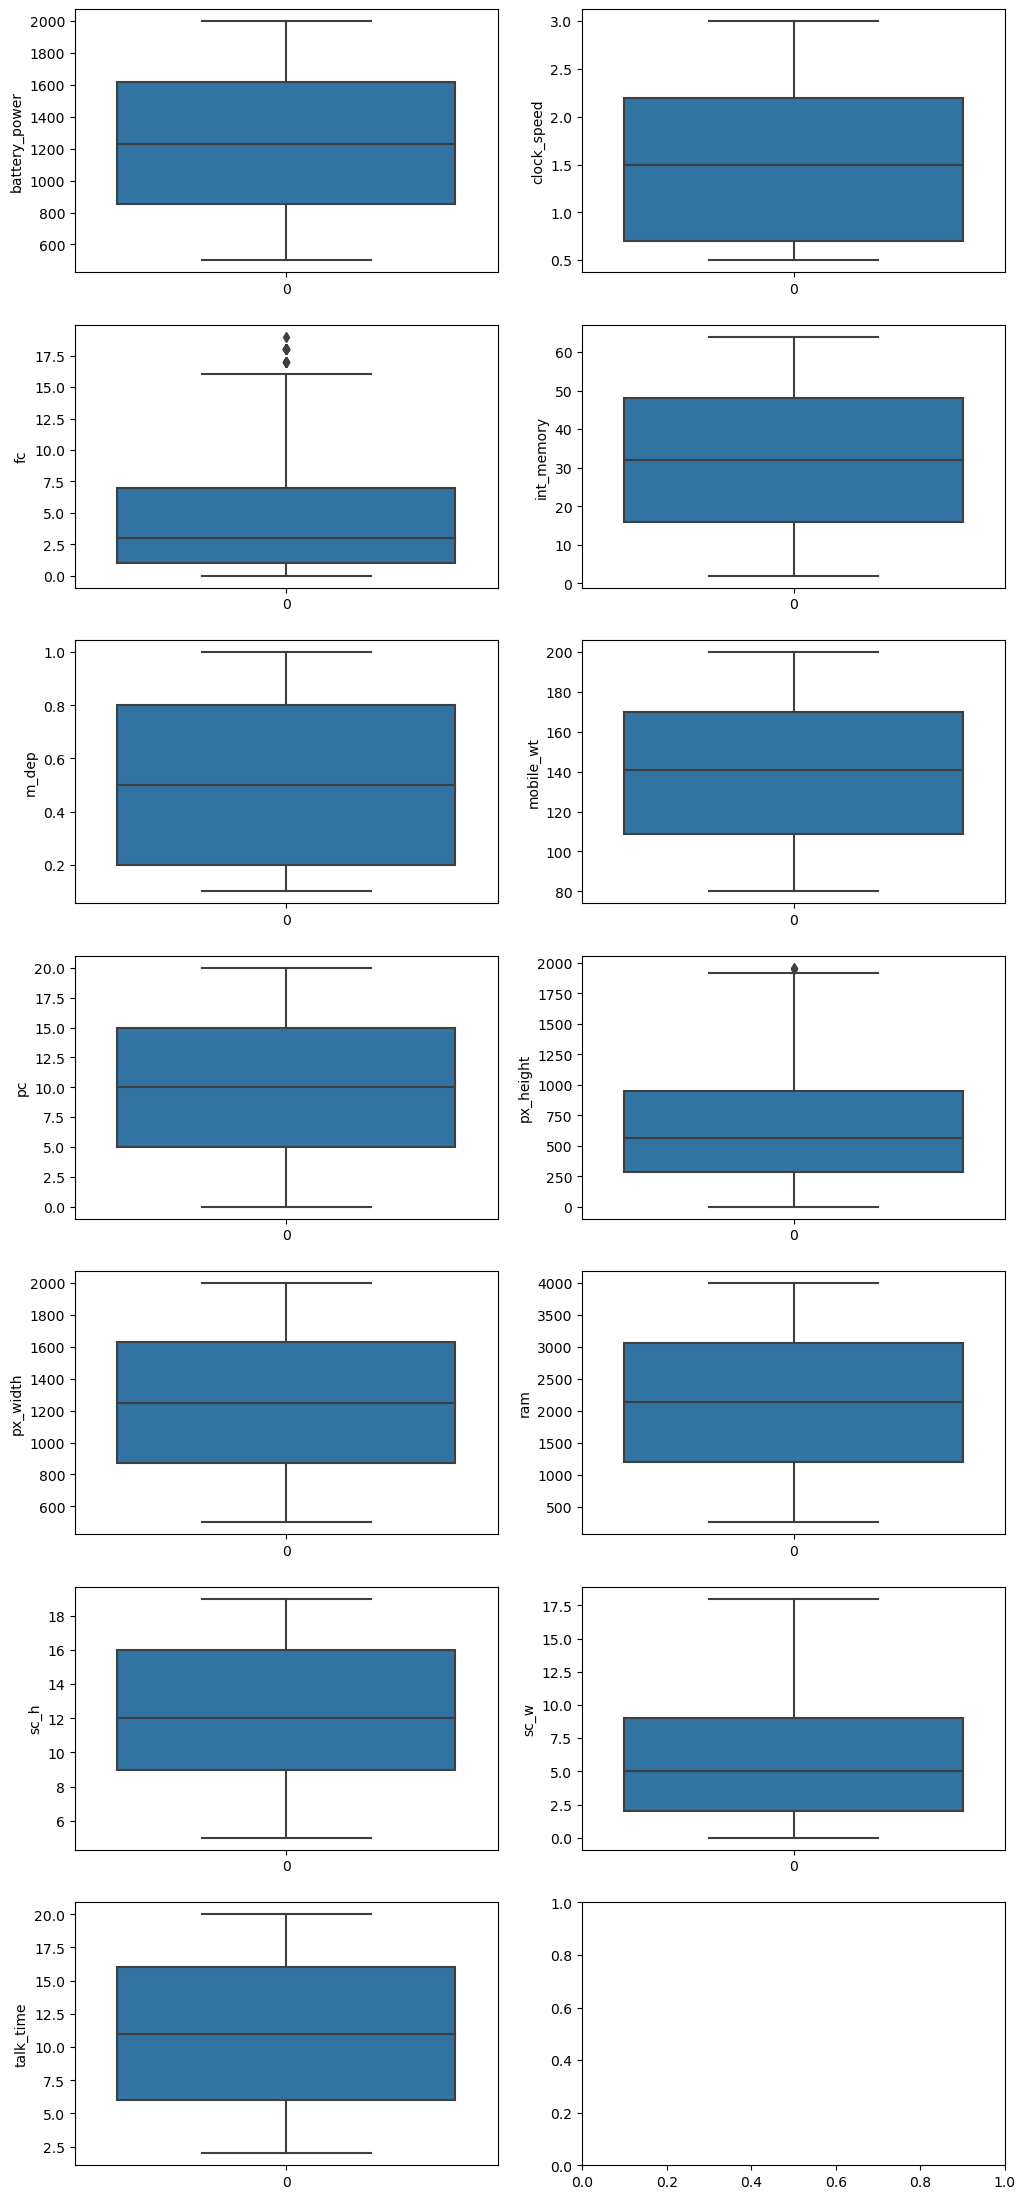

In [37]:
fig, axes = plt.subplots(7,2, figsize = (12, 28))
sns.boxplot(data['battery_power'], ax = axes[0][0])
axes[0][0].set_ylabel('battery_power')
sns.boxplot(data['clock_speed'], ax = axes[0][1])
axes[0][1].set_ylabel('clock_speed')
sns.boxplot(data['fc'], ax = axes[1][0])
axes[1][0].set_ylabel('fc')
sns.boxplot(data['int_memory'], ax = axes[1][1])
axes[1][1].set_ylabel('int_memory')
sns.boxplot(data['m_dep'], ax = axes[2][0])
axes[2][0].set_ylabel('m_dep')
sns.boxplot(data['mobile_wt'], ax = axes[2][1])
axes[2][1].set_ylabel('mobile_wt')
sns.boxplot(data['pc'], ax = axes[3][0])
axes[3][0].set_ylabel('pc')
sns.boxplot(data['px_height'], ax = axes[3][1])
axes[3][1].set_ylabel('px_height')
sns.boxplot(data['px_width'], ax = axes[4][0])
axes[4][0].set_ylabel('px_width')
sns.boxplot(data['ram'], ax = axes[4][1])
axes[4][1].set_ylabel('ram')
sns.boxplot(data['sc_h'], ax = axes[5][0])
axes[5][0].set_ylabel('sc_h')
sns.boxplot(data['sc_w'], ax = axes[5][1])
axes[5][1].set_ylabel('sc_w')
sns.boxplot(data['talk_time'], ax = axes[6][0])
axes[6][0].set_ylabel('talk_time')
plt.show()

In [3]:
for i in ['fc', 'px_height']:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    data[i].where(data[i] > lower_limit, lower_limit, inplace = True)
    data[i].where(data[i] < upper_limit, upper_limit, inplace = True)

## Scaling

In [4]:
X = data.drop('price_range', axis = 1)
y = data['price_range']

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Feature Selection

In [6]:
X = pd.DataFrame(X, columns = scaler.get_feature_names_out())

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
from sklearn.feature_selection import f_classif, SelectKBest
fs = SelectKBest(f_classif, k=10)

In [9]:
X_fs = fs.fit_transform(X_train, y_train)
anova=pd.Series(fs.scores_)
anova.index = X_train.columns
anova.sort_values(ascending=False)

ram              2473.586571
battery_power      23.696509
px_width           16.330211
px_height          14.366081
n_cores             3.649294
mobile_wt           3.610165
int_memory          3.152611
touch_screen        1.515856
four_g              1.130830
sc_h                1.010363
talk_time           0.952192
m_dep               0.892456
sc_w                0.891255
blue                0.833473
fc                  0.642778
dual_sim            0.507678
pc                  0.486237
wifi                0.174387
three_g             0.172285
clock_speed         0.047401
dtype: float64

In [10]:
print(X_train.columns[fs.get_support()])

Index(['battery_power', 'four_g', 'int_memory', 'mobile_wt', 'n_cores',
       'px_height', 'px_width', 'ram', 'sc_h', 'touch_screen'],
      dtype='object')


___
# Model

In [12]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_fs, y_train)
y_pred = model.predict(fs.transform(X_test))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.964
[[122   2   0   0]
 [  3 105   2   0]
 [  0   7 116   2]
 [  0   0   2 139]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       124
           1       0.92      0.95      0.94       110
           2       0.97      0.93      0.95       125
           3       0.99      0.99      0.99       141

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_fs, y_train)
y_pred = model.predict(fs.transform(X_test))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.85
[[115   9   0   0]
 [ 10  89  11   0]
 [  0  10  97  18]
 [  0   0  17 124]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       124
           1       0.82      0.81      0.82       110
           2       0.78      0.78      0.78       125
           3       0.87      0.88      0.88       141

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_fs, y_train)
y_pred = model.predict(fs.transform(X_test))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9
[[122   2   0   0]
 [  7  92  11   0]
 [  0  11 105   9]
 [  0   0  10 131]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       124
           1       0.88      0.84      0.86       110
           2       0.83      0.84      0.84       125
           3       0.94      0.93      0.93       141

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500



In [16]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_fs, y_train)
y_pred = model.predict(fs.transform(X_test))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.962
[[122   2   0   0]
 [  4 104   2   0]
 [  0   7 116   2]
 [  0   0   2 139]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       124
           1       0.92      0.95      0.93       110
           2       0.97      0.93      0.95       125
           3       0.99      0.99      0.99       141

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [17]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,35)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    knn.fit(X_fs, y_train)
    y_pred = knn.predict(fs.transform(X_test))
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)
print(metric_k)

[0.602, 0.618, 0.624, 0.642, 0.666, 0.66, 0.674, 0.658, 0.668, 0.674, 0.678, 0.676, 0.68, 0.688, 0.694, 0.686, 0.69, 0.702, 0.698, 0.706, 0.718, 0.708, 0.716, 0.714, 0.714, 0.722, 0.694, 0.696, 0.69, 0.694, 0.706, 0.71]


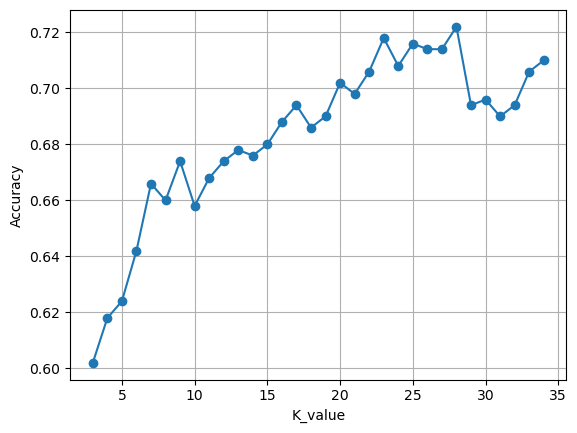

In [18]:
plt.plot(neighbors, metric_k, 'o-')
plt.xlabel('K_value')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [19]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_fs, y_train)
y_pred = model.predict(fs.transform(X_test))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.664
[[97 27  0  0]
 [10 92  8  0]
 [ 0 33 80 12]
 [ 0  0 78 63]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       124
           1       0.61      0.84      0.70       110
           2       0.48      0.64      0.55       125
           3       0.84      0.45      0.58       141

    accuracy                           0.66       500
   macro avg       0.71      0.68      0.67       500
weighted avg       0.72      0.66      0.66       500



In [20]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_fs, y_train)
y_pred = model.predict(fs.transform(X_test))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.914
[[121   3   0   0]
 [  4  99   7   0]
 [  0  10 106   9]
 [  0   0  10 131]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       124
           1       0.88      0.90      0.89       110
           2       0.86      0.85      0.85       125
           3       0.94      0.93      0.93       141

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500



In [21]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_fs, y_train)
y_pred = model.predict(fs.transform(X_test))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.922
[[122   2   0   0]
 [  7  96   7   0]
 [  0   7 109   9]
 [  0   0   7 134]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       124
           1       0.91      0.87      0.89       110
           2       0.89      0.87      0.88       125
           3       0.94      0.95      0.94       141

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500

